#Aula 04 - Disciplina de Biorreatores

Vamos integrar a equação diferencial
$ \frac{dCx}{dt} = \mu \cdot Cx $
os valores de mi = 0.1 (1/hora) e Cx0 = 1 g/L

[[ 0.          1.        ]
 [ 0.4         1.04081076]
 [ 0.8         1.08328706]
 [ 1.2         1.12749684]
 [ 1.6         1.17351086]
 [ 2.          1.22140274]
 [ 2.4         1.27124914]
 [ 2.8         1.32312981]
 [ 3.2         1.37712777]
 [ 3.6         1.43332941]
 [ 4.          1.49182469]
 [ 4.4         1.55270721]
 [ 4.8         1.6160744 ]
 [ 5.2         1.68202765]
 [ 5.6         1.7506725 ]
 [ 6.          1.8221188 ]
 [ 6.4         1.89648088]
 [ 6.8         1.97387774]
 [ 7.2         2.05443325]
 [ 7.6         2.1382763 ]
 [ 8.          2.22554102]
 [ 8.4         2.31636706]
 [ 8.8         2.41089976]
 [ 9.2         2.50929044]
 [ 9.6         2.61169654]
 [10.          2.7182819 ]
 [10.4         2.82921709]
 [10.8         2.94467963]
 [11.2         3.06485429]
 [11.6         3.18993337]
 [12.          3.32011702]
 [12.4         3.45561356]
 [12.8         3.59663983]
 [13.2         3.74342149]
 [13.6         3.89619342]
 [14.          4.0552001 ]
 [14.4         4.22069595]
 

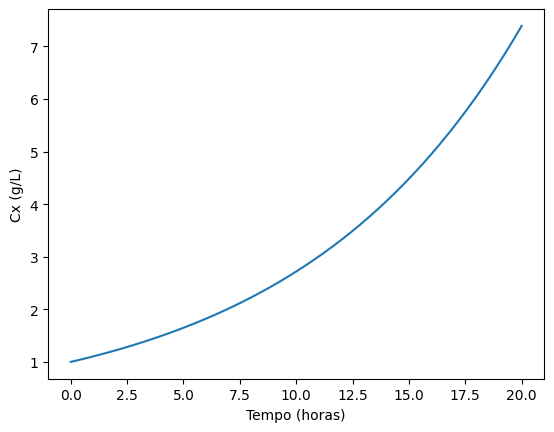

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

mi = 0.1

def cresc_microbiano(Cx, t):
    dCxdt = mi * Cx
    return dCxdt

# Condição inicial
Cx0 = 1

# Valores do tempo
t = np.linspace(0, 20, 51)
t_t = np.transpose(t)

# Resolvendo a equação diferencial
Cx = odeint(cresc_microbiano, Cx0, t)

# Criando a matriz com t e Cx lado a lado
matriz_resultados = np.column_stack((t, Cx))

# Imprimindo a matriz (opcional)
print(matriz_resultados)

# Construindo o gráfico
plt.plot(t, Cx)
plt.xlabel("Tempo (horas)")
plt.ylabel("Cx (g/L)")
plt.show()

Agora  integrar a equação diferencial $ \frac{dCx}{dt} = \mu \cdot Cx $ utilizando vários valores de mi e Cx0 = 1 g/L


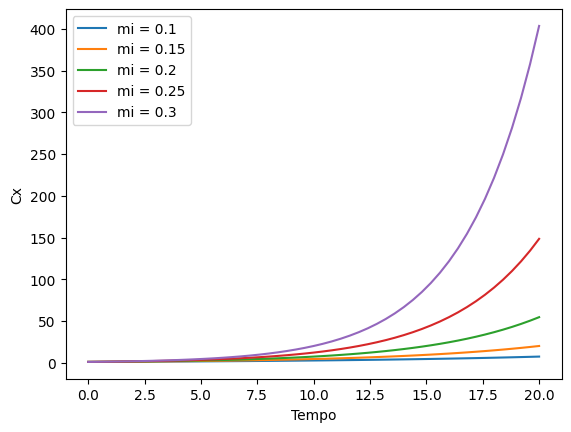

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lista de valores de mi
valores_mi = [0.1, 0.15, 0.2, 0.25, 0.3]  # Exemplo com 5 valores

# Condição inicial
Cx0 = 1

# Valores do tempo
t = np.linspace(0, 20, 51)

# Resolvendo a equação diferencial para cada mi
for mi in valores_mi:
    def cresc_microbiano(Cx, t, mi=mi):  # mi como argumento da função
        dCxdt = mi * Cx
        return dCxdt

    Cx = odeint(cresc_microbiano, Cx0, t)

    # Construindo o gráfico para cada mi
    plt.plot(t, Cx, label=f"mi = {mi}")

# Configurações do gráfico
plt.xlabel("Tempo")
plt.ylabel("Cx")
plt.legend()  # Adiciona legenda para identificar cada curva
plt.show()

Agora  integrar a equação diferencial $ \frac{dCx}{dt} = \mu \cdot Cx $ utilizando vários valores de Cx0 e mi = 0.1 1/h


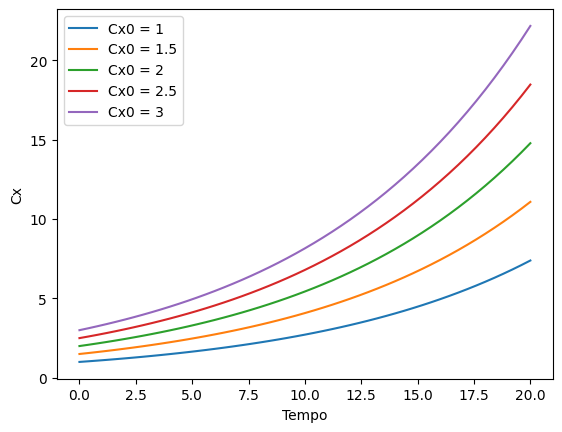

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Valor fixo de mi
mi = 0.1

# Lista de valores de Cx0
valores_Cx0 = [1, 1.5, 2, 2.5, 3]  # Exemplo com 5 valores

# Valores do tempo
t = np.linspace(0, 20, 51)

# Resolvendo a equação diferencial para cada Cx0
for Cx0 in valores_Cx0:
    def cresc_microbiano(Cx, t):
        dCxdt = mi * Cx
        return dCxdt

    Cx = odeint(cresc_microbiano, Cx0, t)

    # Construindo o gráfico para cada Cx0
    plt.plot(t, Cx, label=f"Cx0 = {Cx0}")

# Configurações do gráfico
plt.xlabel("Tempo")
plt.ylabel("Cx")
plt.legend()  # Adiciona legenda para identificar cada curva
plt.show()

Cx0 otimizado: 0.9695385266152508
mi otimizado: 0.11367947716180035
R²: 0.9999321450354598


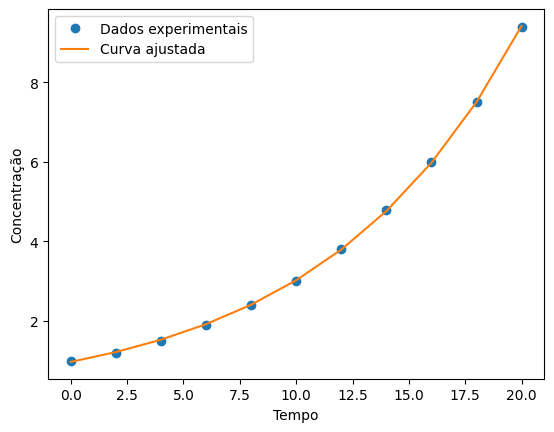

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def cresc_microbiano(t, Cx0, mi):
    return Cx0 * np.exp(mi * t)

# Dados experimentais
tempo_experimental = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
concentracao_experimental = np.array([1.0, 1.2, 1.5, 1.9, 2.4, 3.0, 3.8, 4.8, 6.0, 7.5, 9.4])

# Ajuste da curva
parametros_otimizados, matriz_covariancia = curve_fit(cresc_microbiano, tempo_experimental, concentracao_experimental)
Cx0_otimizado, mi_otimizado = parametros_otimizados

print(f"Cx0 otimizado: {Cx0_otimizado}")
print(f"mi otimizado: {mi_otimizado}")

# Valores previstos pelo modelo
concentracao_prevista = cresc_microbiano(tempo_experimental, Cx0_otimizado, mi_otimizado)

# Cálculo do R²
r_squared = r2_score(concentracao_experimental, concentracao_prevista)
print(f"R²: {r_squared}")

# Gráfico
plt.plot(tempo_experimental, concentracao_experimental, 'o', label='Dados experimentais')
plt.plot(tempo_experimental, concentracao_prevista, '-', label='Curva ajustada')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()

Cx0 otimizado: 1.0505670091109744
mi otimizado: 0.10932755382884984
R²: 0.9973473715007757


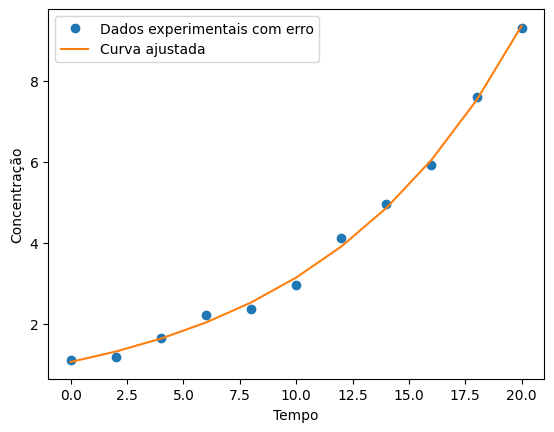

In [18]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Defina a semente para reprodutibilidade
np.random.seed(42)

def cresc_microbiano(t, Cx0, mi):
    return Cx0 * np.exp(mi * t)

# Dados experimentais originais
tempo_experimental = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
concentracao_experimental = np.array([1.0, 1.2, 1.5, 1.9, 2.4, 3.0, 3.8, 4.8, 6.0, 7.5, 9.4])

# Adicionando erro aleatório
erro_aleatorio = np.random.normal(0, 0.20, len(concentracao_experimental))
concentracao_experimental_com_erro = concentracao_experimental + erro_aleatorio

# Ajuste da curva
parametros_otimizados, matriz_covariancia = curve_fit(cresc_microbiano, tempo_experimental, concentracao_experimental_com_erro)
Cx0_otimizado, mi_otimizado = parametros_otimizados

print(f"Cx0 otimizado: {Cx0_otimizado}")
print(f"mi otimizado: {mi_otimizado}")

# Valores previstos pelo modelo
concentracao_prevista = cresc_microbiano(tempo_experimental, Cx0_otimizado, mi_otimizado)

# Cálculo do R²
r_squared = r2_score(concentracao_experimental_com_erro, concentracao_prevista)
print(f"R²: {r_squared}")

# Gráfico
plt.plot(tempo_experimental, concentracao_experimental_com_erro, 'o', label='Dados experimentais com erro')
plt.plot(tempo_experimental, concentracao_prevista, '-', label='Curva ajustada')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.show()